### Decomposition:
y = trend + variance change + seasonality + X + noise 


*How to deal with the 29th of feb? 366 vs 365 days*

In [1]:
#Decomposing and Recompositing:
# most of the time, you will have to decompose something (e.g. take out the tend)
# AND then RECOMPOSE it at the end
# the decomposed data is still a timeseries too!

# preprocess the data until you do not violate the assumptions 
# for linear regression anymore!

# with deriving the monthly means from our model we get a least 12 parameters
# as model input

# the trick is:
# try the models
# if you get a high score but the cross validation is skewed
# then the preprocessing was not sufficient


# train model and raw data and decomposed data 
# -> the mean squared error will tell you which to choose!!! 

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('data/temp_data_cleaned.csv', index_col=0)
df.head(10)

,TG
DATE,
1876-01-01,275.35
1876-01-02,275.65
1876-01-03,273.45
1876-01-04,267.35
1876-01-05,263.35
1876-01-06,265.45
1876-01-07,266.55
1876-01-08,264.25
1876-01-09,260.45


### Differential: Trend

**Treat for Trend**
- How many orders we treat for defines our 'integration'
    - first order diffs: de-trend linear plots
    - second order diffs: de-trend polynomial plots
    - third +: are rarely needed

In [49]:
# removinf the trend out of the data:
df['diff'] = df['TG'].diff() # differential = the relative change
# the change between the current value and the value at the previous timestamp

In [50]:
df['diff'].mean()

0.000342757588956009

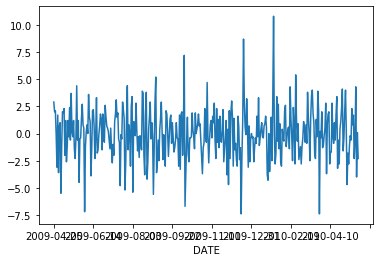

In [54]:
df['diff'].loc['2009-04-25':'2010-05-15'].plot()

as we **canot see any increase in variance** in the data in the plot we **DO NOT** need to apply the diff to the log of the passenger dataset

### Percentage change
removes trend and variance change

In [7]:
df['pct'] = df['TG'].pct_change()
df.head()

,TG,diff,pct
DATE,,,
1876-01-01,275.35,NaN,NaN
1876-01-02,275.65,0.3,0.001090
1876-01-03,273.45,-2.2,-0.007981
1876-01-04,267.35,-6.1,-0.022308
1876-01-05,263.35,-4.0,-0.014962


In [8]:
df['pct'].mean()

3.684896937016181e-05

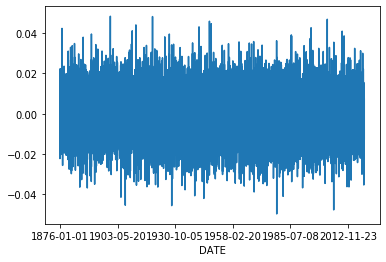

In [9]:
df['pct'].plot()

### Seasonality
- use transform to calculate the monthly mean
- then de-mean each value by its respective mean

In [45]:
# format index column to datetime format again
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
# create month column from DATETIME index 
df['month'] = df.index.month
df.head(), df.tail()

(                TG  diff       pct  month
 DATE                                     
 1876-01-01  275.35   NaN       NaN      1
 1876-01-02  275.65   0.3  0.001090      1
 1876-01-03  273.45  -2.2 -0.007981      1
 1876-01-04  267.35  -6.1 -0.022308      1
 1876-01-05  263.35  -4.0 -0.014962      1,
                 TG  diff       pct  month
 DATE                                     
 2020-07-27  293.85   2.0  0.006853      7
 2020-07-28  296.15   2.3  0.007827      7
 2020-07-29  292.35  -3.8 -0.012831      7
 2020-07-30  291.35  -1.0 -0.003421      7
 2020-07-31  293.45   2.1  0.007208      7)

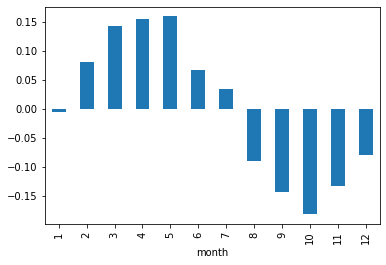

In [12]:
# monthly means
mm = df.groupby('month')['diff'].mean()
mm.plot.bar()

In [13]:
# use TRANSFROM to reduce the diff temp value by the mean of the month it finds itself
df['monthly_mean'] = df.groupby('month')['diff'].transform('mean')
df.head(3)

,TG,diff,pct,month,monthly_mean
DATE,,,,,
1876-01-01,275.35,NaN,NaN,1,-0.005496
1876-01-02,275.65,0.3,0.001090,1,-0.005496
1876-01-03,273.45,-2.2,-0.007981,1,-0.005496


In [16]:
#df['diff'] = df['diff'].fillna(value=0)

In [17]:
df['stationary_temp'] =  df['diff']- df['monthly_mean']
df.head(3)
# stationary temp has had variance, trend and seasonality removed

,TG,diff,pct,month,monthly_mean,stationary_temp
DATE,,,,,,
1876-01-01,275.35,NaN,NaN,1,-0.005496,NaN
1876-01-02,275.65,0.3,0.001090,1,-0.005496,0.305496
1876-01-03,273.45,-2.2,-0.007981,1,-0.005496,-2.194504


### Detrend

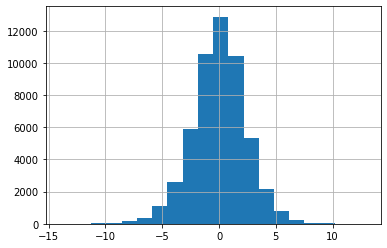

In [28]:
# Subtraction
df['detrend_sub'] = df['diff'] - df['monthly_mean']
df['detrend_sub'].hist(bins=20) # subtraction is more robust

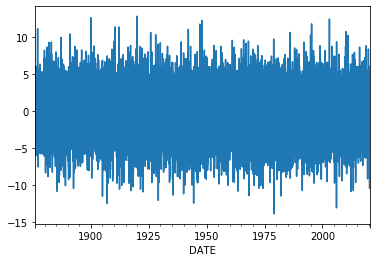

In [32]:
df['detrend_sub'].plot() # identifies outliers

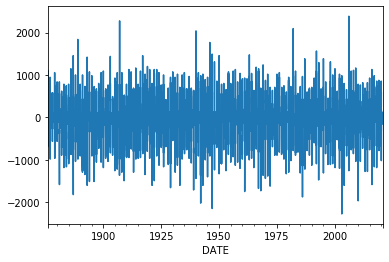

In [27]:
# Division 
df['detrend_div'] = df['diff'] / df['monthly_mean']
df['detrend_div'].plot() # identifies outliers

In [25]:
df['detrend_div'].mean()

1.000000000000015

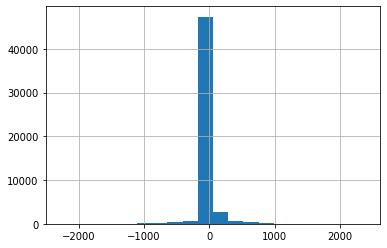

In [26]:
df['detrend_div'].hist(bins=20)

### Export decomposed and stationarized data

In [44]:
df.to_csv('data/temp_data_decomposed_stationarized.csv', index=True)

### Extra: Seasonal decompose with statsmodel 

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

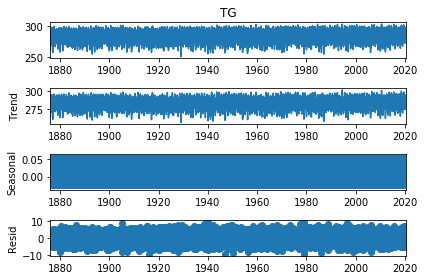

In [43]:
# additive == diff
x = seasonal_decompose(df['TG'])
plot = x.plot() 

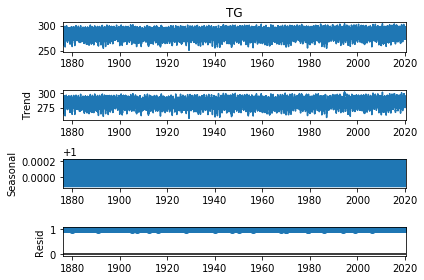

In [31]:
# # multiplicative 
x2 = seasonal_decompose(df['TG'], model='multiplicative')
plot2 = x2.plot()
# # Multiplicative does not make sense for temperature!